# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [47]:
# naložimo paket
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path
# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.set_option("display.max_rows", 10)

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline
# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv(os.path.join('../../', '02-zajem-podatkov', 'predavanja', 'obdelani-podatki', 'filmi.csv'), index_col='id')

Poglejmo si podatke.

In [4]:
filmi

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
id,,,,,,,,,
4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...
11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [19]:
po_ocenah = filmi.sort_values(by='ocena', ascending = False)
po_ocenah

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene_ocene
id,,,,,,,,,,
252487,Hababam Sinifi,87,1975,9.3,NaN,36468,NaN,NaN,"Lazy, uneducated students share a very close b...",9.0
111161,Kaznilnica odrešitve,142,1994,9.3,80.0,2293163,28341469.0,R,Two imprisoned men bond over a number of years...,9.0
68646,Boter,175,1972,9.2,100.0,1582906,134966411.0,NaN,The aging patriarch of an organized crime dyna...,9.0
5354160,Aynabaji,147,2016,9.1,NaN,21429,NaN,NaN,Ayna is an actor and the prison is his stage. ...,9.0
7738784,Peranbu,147,2018,9.0,NaN,11866,NaN,NaN,"A single father tries to raise his daughter, w...",9.0
...,...,...,...,...,...,...,...,...,...,...
5988370,Reis,108,2017,1.4,NaN,72207,NaN,NaN,A drama about the early life of Recep Tayyip E...,1.0
6038600,Smolensk,120,2016,1.4,NaN,7630,NaN,NaN,Inspired by true events of 2010 Polish Air For...,1.0
4009460,Saving Christmas,79,2014,1.4,18.0,14855,2783970.0,PG,His annual Christmas party faltering thanks to...,1.0


Poberite stolpec ocen.

In [22]:
stolpec_ocen = filmi[["ocena"]]
stolpec_ocen.head()

,ocena
id,
4972,6.3
6864,7.7
9968,7.3
10323,8.1
12349,8.3


Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [26]:
ocene = filmi['ocena']
ocene.head()

id
4972     6.3
6864     7.7
9968     7.3
10323    8.1
12349    8.3
Name: ocena, dtype: float64

In [24]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [27]:
zaokr = stolpec_ocen.round()

Dodajte zaokrožene vrednosti v podatke.

In [28]:
filmi['zaokrozene_ocene'] = stolpec_ocen.round()
filmi

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene_ocene
id,,,,,,,,,,
4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...
11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr...",6.0
11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...,6.0
12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...,7.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [29]:
filmi.drop(columns='zaokrozene_ocene')

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
id,,,,,,,,,
4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...
11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [32]:
podtabela = filmi[['naslov', 'leto', 'glasovi']].copy()
podtabela['zaokrozene_ocene'] = zaokr
podtabela.head()

,naslov,leto,glasovi,zaokrozene_ocene
id,,,,
4972,The Birth of a Nation,1915,22363,6.0
6864,Intolerance: Love's Struggle Throughout the Ages,1916,13970,8.0
9968,Broken Blossoms or The Yellow Man and the Girl,1919,9296,7.0
10323,Das Cabinet des Dr. Caligari,1920,56089,8.0
12349,The Kid,1921,110278,8.0


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [33]:
filmi.query('leto < 1930 or leto > 2017')

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene_ocene
id,,,,,,,,,,
4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...
11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr...",6.0
11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...,6.0
12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...,7.0


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [35]:
def kratek(niz): 
    return niz.count(' ') <= 1

pogoj = filmi['naslov'].apply(kratek)
pogoj1 = filmi['ocena'] > 8
filmi[pogoj & pogoj1]

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene_ocene
id,,,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
12364,Körkarlen,107,1921,8.1,NaN,10158,NaN,NaN,"On New Year's Eve, the driver of a ghostly car...",8.0
15324,Sherlock Jr.,45,1924,8.2,NaN,40303,977375.0,NaN,"A film projectionist longs to be a detective, ...",8.0
15864,Zlata mrzlica,95,1925,8.2,NaN,98472,5450000.0,NaN,A prospector goes to the Klondike in search of...,8.0
15881,Greed,140,1924,8.1,NaN,8940,161800.0,NaN,The sudden fortune won from a lottery fans suc...,8.0
...,...,...,...,...,...,...,...,...,...,...
8579674,1917,119,2019,8.3,78.0,375975,159227644.0,R,"April 6th, 1917. As a regiment assembles to wa...",8.0
9052870,Chhichhore,143,2019,8.2,NaN,30459,898575.0,NaN,"A tragic incident forces Anirudh, a middle-age...",8.0
9477520,Asuran,141,2019,8.5,NaN,8974,NaN,NaN,The teenage son of a farmer from an underprivi...,8.0


### Histogrami

Združite filme po ocenah in jih preštejte.

In [43]:
a = filmi.groupby('ocena').size()
a

ocena
1.0    1
1.1    1
1.4    3
1.5    1
1.6    3
      ..
8.9    7
9.0    6
9.1    1
9.2    1
9.3    2
Length: 82, dtype: int64

Naredite stolpični diagram teh podatkov.

<AxesSubplot:xlabel='ocena'>

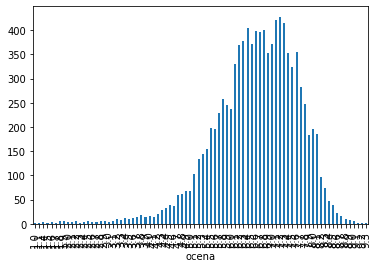

In [48]:
a.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

array([[<AxesSubplot:title={'center':'leto'}>,
        <AxesSubplot:title={'center':'glasovi'}>],
       [<AxesSubplot:title={'center':'zaokrozene_ocene'}>,
        <AxesSubplot:>]], dtype=object)

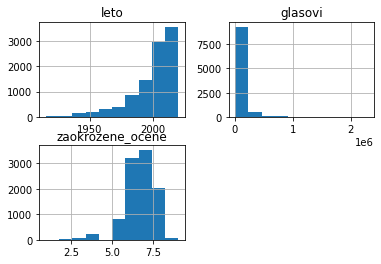

In [49]:
podtabela.hist()

### Izris povprečne dolžine filma glede na leto

array([[<AxesSubplot:title={'center':'dolzina'}>]], dtype=object)

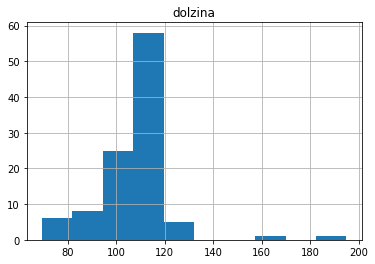

In [51]:
filmi[['leto', 'dolzina']].groupby('leto').mean().hist()

### Izris skupnega zasluzka za posamezno leto

array([[<AxesSubplot:title={'center':'zasluzek'}>]], dtype=object)

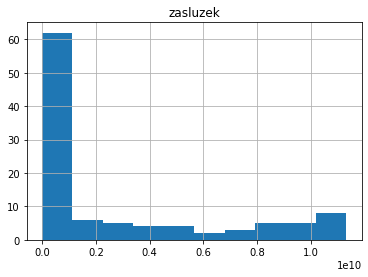

In [52]:
filmi[['leto', 'zasluzek']].groupby('leto').sum().hist()